In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = 'names/'

In [3]:
dict_of_years = {}
for year in range(1900, 2001, 1):
    dict_of_years[year] = pd.read_csv(os.path.join(DATA_PATH, 'yob{}.txt'.format(year)),
    names=['Name','Gender','Count'])
RR_names = pd.concat(dict_of_years, names=['Year', 'Pos'])

In [4]:
bcd_names = RR_names.groupby('Name').sum().sort_values(by='Count', ascending=False).reset_index()

In [5]:
def exclusion_of_vowels(str):
    return sum([1 if a not in 'aeiuyo' else 0 for a in str])

In [6]:
bcd_names['Exclusion_of_vowels'] = bcd_names.apply(lambda row: exclusion_of_vowels(row.Name), axis=1)

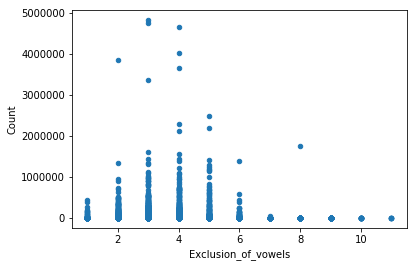

In [7]:
bcd_names.plot.scatter(x='Exclusion_of_vowels', y='Count')